# Opioids Project: Analysis

Ra'Kira Nelson and Alexa Fahrer

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [16]:
opioids = pd.read_csv("data/opioids_clean.csv")
opioids = opioids.copy()
opioids = opioids.drop(columns=["Unnamed: 0"])
opioids

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,prescriptions_per_1000,overdose_per_100k
0,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2006,399232.868993,55.0,655893.0,0,0,608.685973,8.385514
1,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2007,420555.537846,67.0,655163.0,0,0,641.909781,10.226463
2,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2008,440411.156173,63.0,656510.0,0,0,670.836935,9.596198
3,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2009,454896.396006,80.0,658441.0,0,0,690.868880,12.149912
4,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2010,486677.671546,53.0,658230.0,0,1,739.373276,8.051897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,55133,WAUKESHA,"Waukesha County, WI",WAUKESHA COUNTY,WISCONSIN,WI,2015,200375.123762,34.0,396377.0,0,1,505.516525,8.577692
2620,55133,WAUKESHA,NaN,NaN,NaN,WI,2016,192636.391662,NaN,NaN,0,1,NaN,NaN
2621,55133,WAUKESHA,NaN,NaN,NaN,WI,2017,154116.663589,NaN,NaN,0,1,NaN,NaN
2622,55133,WAUKESHA,NaN,NaN,NaN,WI,2018,126187.189934,NaN,NaN,0,1,NaN,NaN


## Control States

> ### NOTE:
> Based off the analysis found in `opioid_project_analysis.ipynb`, ['NEVADA', 'WASHINGTON'] may be reasonable control states to explore. However, this is not considering physical state size, urban/suburban characteristics, etc., only average population size, overdose trends, and prescription shipment trends before 2010. Other states that have similar overdose and prescription trends (but not similar population sizes) are ['LOUISIANA', 'OKLAHOMA', 'TENNESSEE'].
>
> After upping all thresholds to .3, the states with most similar averages in all 3 areas include ['ARIZONA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OKLAHOMA', 'TENNESSEE', 'WASHINGTON']

In [ ]:
control_states = ["KENTUCKY", "ALABAMA", "TENNESSEE"]
opioids_states = opioids[opioids["state"].isin(control_states + ["FLORIDA"])]
opioids_states

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,prescriptions_per_1000,overdose_per_100k
532,12009,BREVARD,"Brevard County, FL",BREVARD COUNTY,FLORIDA,FL,2006,271155.998427,81.0,535138.0,1,0,506.702941,15.136283
533,12009,BREVARD,"Brevard County, FL",BREVARD COUNTY,FLORIDA,FL,2007,298648.156271,84.0,539719.0,1,0,553.340083,15.563654
534,12009,BREVARD,"Brevard County, FL",BREVARD COUNTY,FLORIDA,FL,2008,356583.443752,109.0,542378.0,1,0,657.444520,20.096685
535,12009,BREVARD,"Brevard County, FL",BREVARD COUNTY,FLORIDA,FL,2009,405614.532687,122.0,542109.0,1,0,748.215825,22.504699
536,12009,BREVARD,"Brevard County, FL",BREVARD COUNTY,FLORIDA,FL,2010,514646.897842,119.0,544000.0,1,1,946.042092,21.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,53063,SPOKANE,"Spokane County, WA",SPOKANE COUNTY,WASHINGTON,WA,2011,342424.234751,63.0,473516.0,0,1,723.152406,13.304725
2574,53063,SPOKANE,"Spokane County, WA",SPOKANE COUNTY,WASHINGTON,WA,2012,332798.581658,74.0,475605.0,0,1,699.737349,15.559130
2575,53063,SPOKANE,"Spokane County, WA",SPOKANE COUNTY,WASHINGTON,WA,2013,322520.747650,48.0,478553.0,0,1,673.949902,10.030237
2576,53063,SPOKANE,"Spokane County, WA",SPOKANE COUNTY,WASHINGTON,WA,2014,312766.748695,50.0,483148.0,0,1,647.351844,10.348796


## Plots

### Pre-Trend Checks: Florida vs Control States

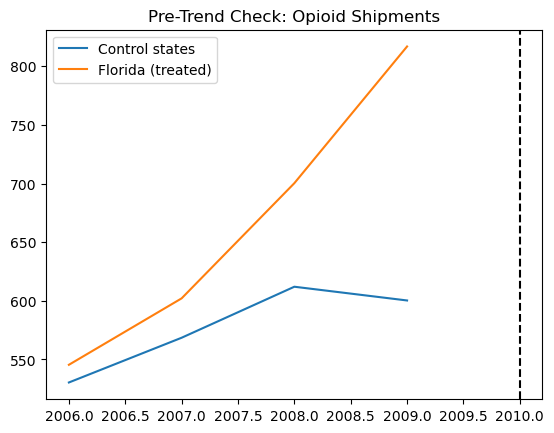

In [23]:
pre = opioids_states[opioids_states["year"] < 2010]

mean_trends = (
    pre.groupby(["policy_state", "year"])["prescriptions_per_1000"].mean().reset_index()
)

for group, d in mean_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    plt.plot(d["year"], d["prescriptions_per_1000"], label=label)

plt.axvline(2010, color="black", linestyle="--")
plt.legend()
plt.title("Pre-Trend Check: Opioid Shipments")
plt.show()

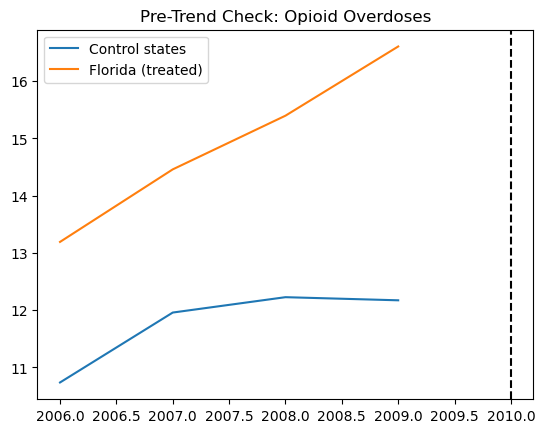

In [19]:
pre = opioids_states[opioids_states["year"] < 2010]

mean_trends = (
    pre.groupby(["policy_state", "year"])["overdose_per_100k"].mean().reset_index()
)

for group, d in mean_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    plt.plot(d["year"], d["overdose_per_100k"], label=label)

plt.axvline(2010, color="black", linestyle="--")
plt.legend()
plt.title("Pre-Trend Check: Opioid Overdoses")
plt.show()

### Pre-Post: Florida

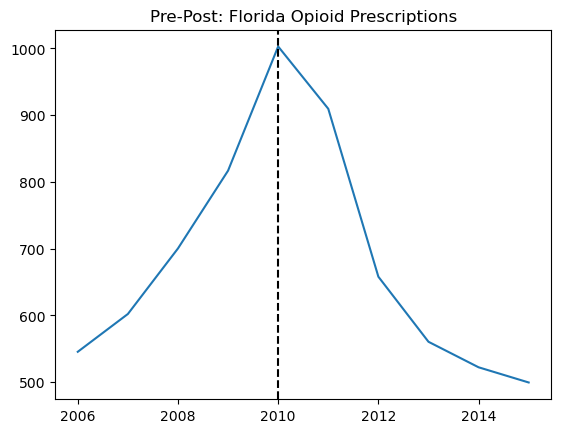

In [20]:
fl = opioids_states[opioids_states["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["prescriptions_per_1000"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Prescriptions")
plt.show()

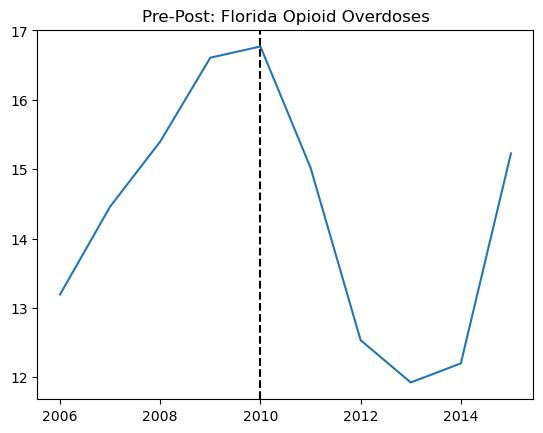

In [21]:
fl = opioids_states[opioids_states["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["overdose_per_100k"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Overdoses")
plt.show()